<a href="https://colab.research.google.com/github/NatalyAraiza/Introduccion_estadistica_R/blob/master/crecimiento_real_PIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Se pretende analizar el porcentaje de crecimiento del Producto Interno Bruto de 1994-2019 proporcionado por el INEGI utilizando herramientas de estadística en el lenguaje R

In [ ]:
getwd()

[1] "/content"

**Se cargan los datos en formato csv y se guardan en la variable "datos" en formato Dataframe**

In [ ]:
datos <- read.table("Crecimiento real del PIB.csv", sep =",", header=TRUE)

In [ ]:
head(datos) #los primeros elementos de la tabla

,Periodo,Porcentaje
,<fct>,<dbl>
1,1994/01,3.34197
2,1994/02,5.91376
3,1994/03,5.32963
4,1994/04,5.15238
5,1995/01,-1.48542
6,1995/02,-9.06758


In [ ]:
names(datos) #nombres de columnas

[1] "Periodo"    "Porcentaje"

In [ ]:
str(datos)

'data.frame':	101 obs. of  2 variables:
 $ Periodo   : Factor w/ 101 levels "1994/01","1994/02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Porcentaje: num  3.34 5.91 5.33 5.15 -1.49 ...


In [ ]:
dim(datos) #dimensiones

[1] 101   2

In [ ]:
class(datos)

[1] "data.frame"

In [ ]:
density(datos$Porcentaje)


Call:
	density.default(x = datos$Porcentaje)

Data: datos$Porcentaje (101 obs.);	Bandwidth 'bw' = 0.7279

       x                   y            
 Min.   :-11.25117   Min.   :9.503e-05  
 1st Qu.: -5.64212   1st Qu.:9.143e-03  
 Median : -0.03307   Median :1.616e-02  
 Mean   : -0.03307   Mean   :4.453e-02  
 3rd Qu.:  5.57598   3rd Qu.:5.620e-02  
 Max.   : 11.18503   Max.   :1.939e-01  

In [50]:
install.packages("ggplot2")
library(ggplot2) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Grafica sencilla de los datos

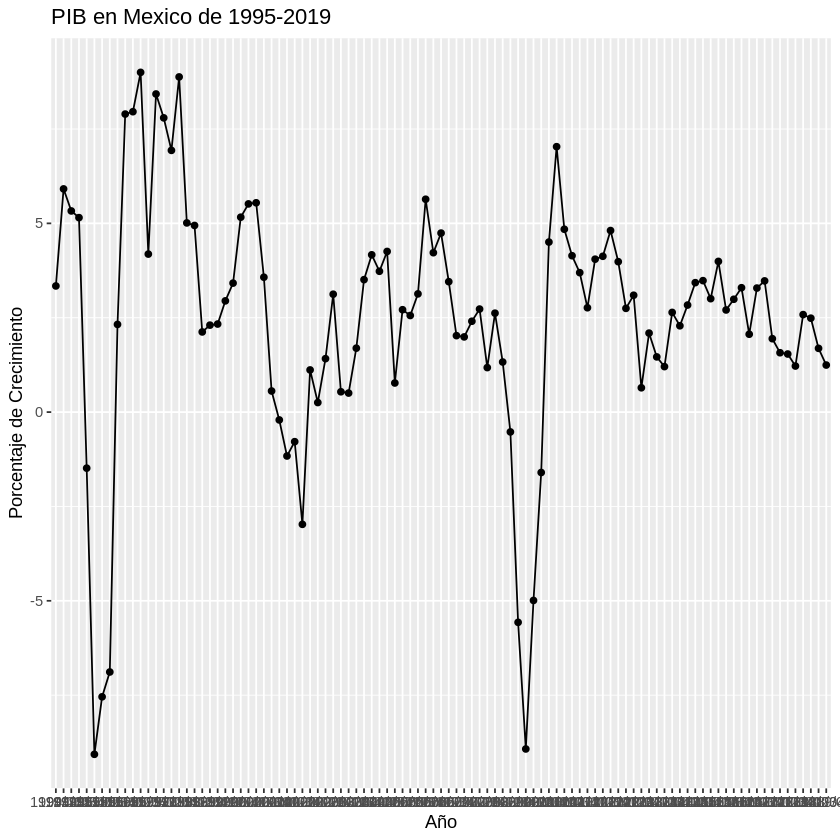

In [56]:
plot <- ggplot(datos, aes(Periodo, Porcentaje, group = 1)) +
         geom_point() +
         geom_line() +
         labs(x = "Año", y = "Porcentaje de Crecimiento", 
              title = "PIB en Mexico de 1995-2019")
plot

**comandos estadísticos basicos**

In [ ]:
n <- length(datos$Porcentaje) #Total de datos
n

[1] 101

In [ ]:
n_clases <- sqrt(n) #numero de clases para grafícar
n_clases

[1] 10.04988

In [ ]:
media <- mean(datos$Porcentaje) #media
media

[1] 2.471983

In [ ]:
mediana <- median(datos$Porcentaje) #mediana
mediana

[1] 2.74854

In [ ]:
moda = table(datos$Porcentaje) #moda
moda


-9.06758 -8.92601 -7.54378 -6.88648 -5.57061 -4.99051 -2.97417  -1.6007 
       1        1        1        1        1        1        1        1 
-1.48542  -1.1637 -0.78344 -0.52534 -0.20808  0.25309  0.50398  0.53819 
       1        1        1        1        1        1        1        1 
 0.55872  0.64414  0.77083  1.11689  1.17897  1.20509  1.22027  1.24632 
       1        1        1        1        1        1        1        1 
 1.32714  1.41593   1.4625  1.53882  1.57271  1.68903  1.69365  1.94478 
       1        1        1        1        1        1        1        1 
 1.99203   2.0256  2.06296   2.0928  2.12357  2.28654  2.30407  2.32278 
       1        1        1        1        1        1        1        1 
 2.33292  2.40672  2.48851    2.559  2.58341   2.6211  2.64116  2.70574 
       1        1        1        1        1        1        1        1 
 2.71255  2.72981  2.74854  2.76489  2.83581  2.94727  2.98937  3.00502 
       1        1        1        1        1      

In [ ]:
#rango
Rango = max(datos$Porcentaje) - min(datos$Porcentaje)
Rango

[1] 18.06902

In [ ]:
#varianza
Varianza = var(datos$Porcentaje)
Varianza

[1] 10.94923

In [ ]:
#desviacion estandar
Desviacion_estandar = sd(datos$Porcentaje)
Desviacion_estandar

[1] 3.308963

In [ ]:
#coeficiente de variacion
Coeficiente_variacion = (Desviacion_estandar/media)*100
Coeficiente_variacion

[1] 133.8586

Sesgo

In [ ]:
#Se instala la libreria y se carga al codigo
install.packages("e1071")
library(e1071)  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
sesgo <- skewness(datos$Porcentaje)
sesgo

[1] -1.235502

Regla empirica (formula)

In [ ]:
Desviacion_estandar = sd(datos$Porcentaje)
n <- length(datos$Porcentaje)
x1 <- media - Desviacion_estandar
x2 <- media + Desviacion_estandar
x3 <- media - (2*Desviacion_estandar)
x4 <- media + (2*Desviacion_estandar)
x5 <- media - (3*Desviacion_estandar)
x6 <- media + (3*Desviacion_estandar)
cat("68% de los datos entre ",x1, "y ",x2)
cat("\n95% de los datos entre ",x3, "y ",x4)
cat("\n99.97% de los datos entre ",x5, "y ",x6)

68% de los datos entre  -0.8369791 y  5.780946
95% de los datos entre  -4.145942 y  9.089909
99.97% de los datos entre  -7.454904 y  12.39887

Regla empirica (grafica)

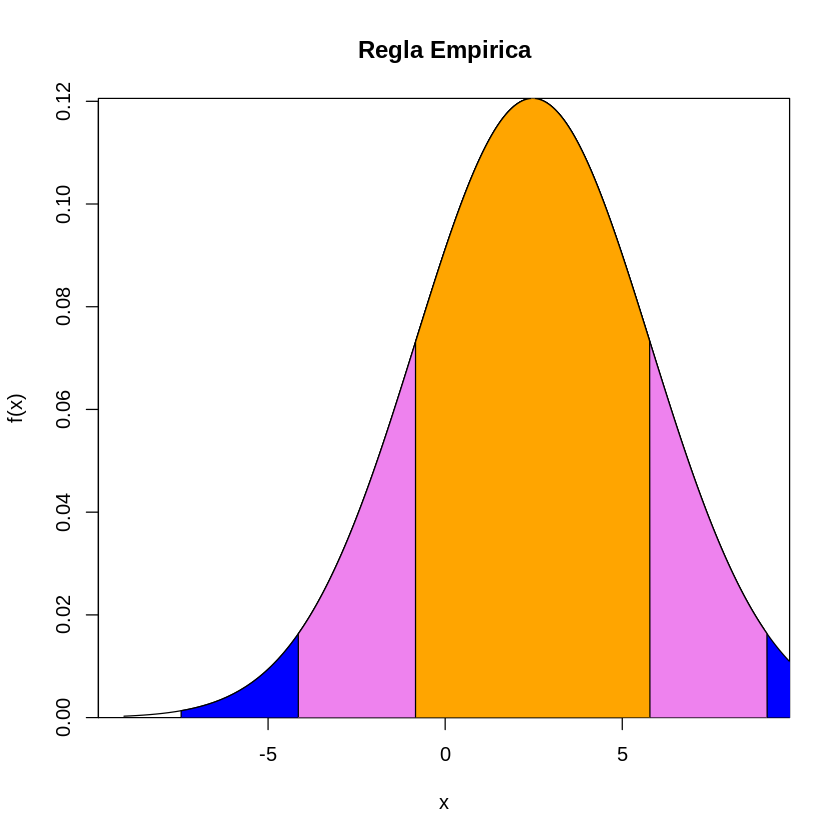

In [ ]:
x <- datos$Porcentaje
ymax =max(dnorm(x, media, Desviacion_estandar))
max = max(datos$Porcentaje)
min = min(datos$Porcentaje)

regionx = seq(x1, x2, 0.01)
xP <- c(x1, regionx, x2)
yP <- c(0, dnorm(regionx, media, Desviacion_estandar), 0)

regiony = seq(x3, x4, 0.01)
aP <- c(x3, regiony, x4)
bP <- c(0, dnorm(regiony, media, Desviacion_estandar), 0)

regionz = seq(x5, x6, 0.01)
cP <- c(x5, regionz, x6)
dP <- c(0, dnorm(regionz, media, Desviacion_estandar), 0)

curve(dnorm(x, media, Desviacion_estandar), xlim = c(min, max), 
                    yaxs = "i", ylim=c(0, ymax), ylab = "f(x)",
                                        main="Regla Empirica")
polygon(cP, dP, col = "blue")
polygon(aP, bP, col = "violet")
polygon(xP, yP, col= "orange1")

Boxplot


Call:
	density.default(x = datos$Porcentaje)

Data: datos$Porcentaje (101 obs.);	Bandwidth 'bw' = 0.7279

       x                   y            
 Min.   :-11.25117   Min.   :9.503e-05  
 1st Qu.: -5.64212   1st Qu.:9.143e-03  
 Median : -0.03307   Median :1.616e-02  
 Mean   : -0.03307   Mean   :4.453e-02  
 3rd Qu.:  5.57598   3rd Qu.:5.620e-02  
 Max.   : 11.18503   Max.   :1.939e-01  

[1] 101

[1] 18.06902

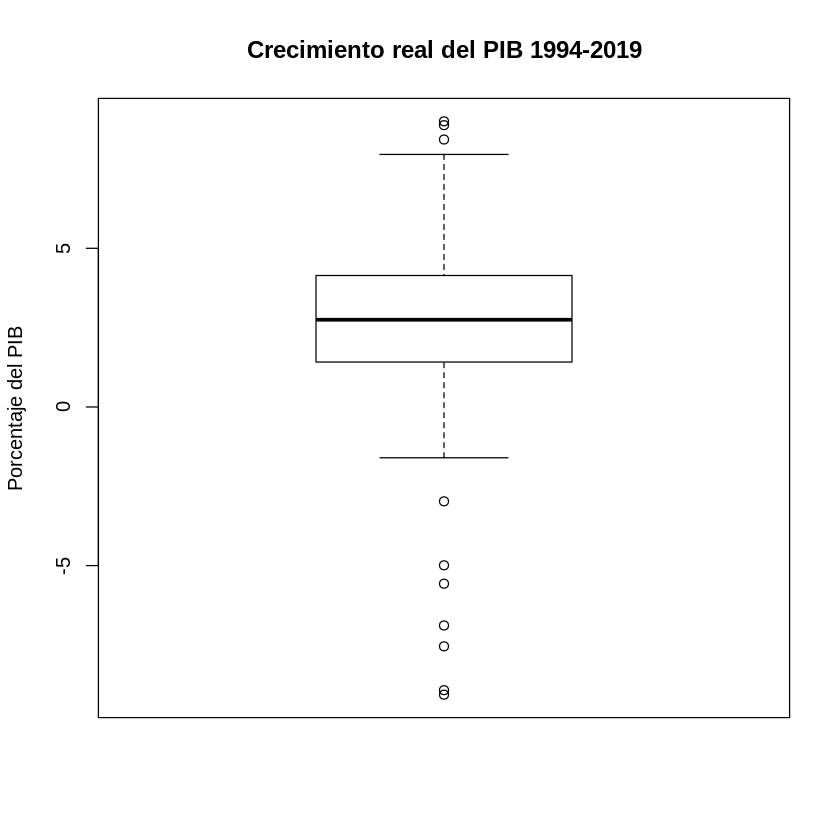

In [ ]:
density(datos$Porcentaje)
n;Rango
boxplot(datos$Porcentaje, main="Crecimiento real del PIB 1994-2019",
        ylab="Porcentaje del PIB")

Histograma con densidad

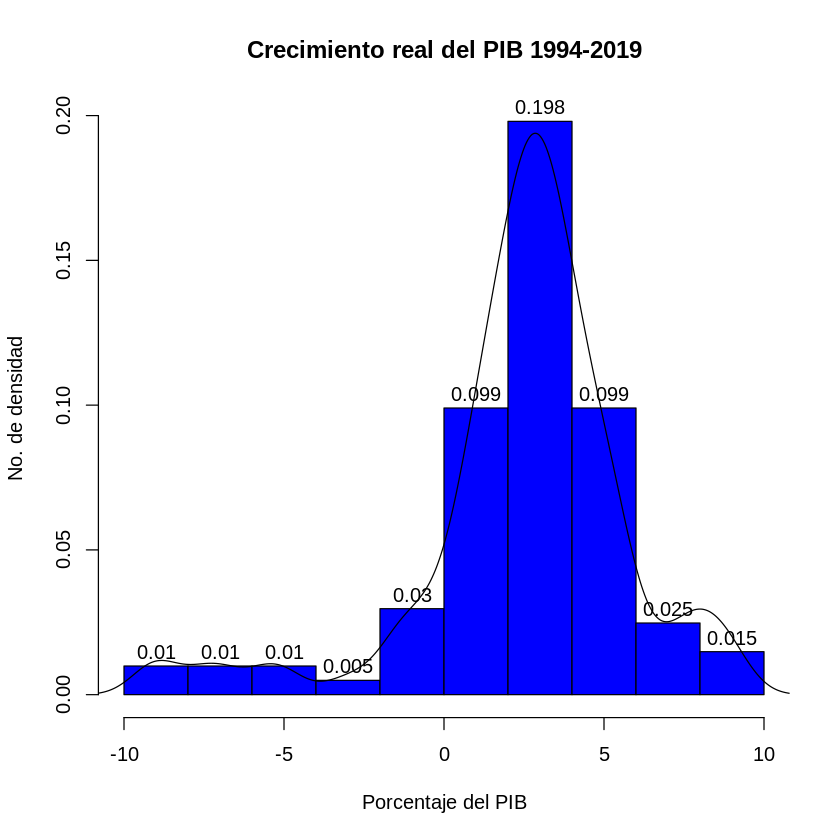

In [ ]:
histograma = hist(datos$Porcentaje, col = "Blue", 
                  nclass = n_clases, labels = TRUE, main = "Crecimiento real del PIB 1994-2019",
                  ylab = "No. de densidad", xlab = "Porcentaje del PIB",
                  border = "black", freq = FALSE)
lines(density(datos$Porcentaje))

Histograma con poligono de frecuencias

In [ ]:
#Se utiliza la libreria agricolae
install.packages("agricolae")
library(agricolae)  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’



Attaching package: ‘agricolae’


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness




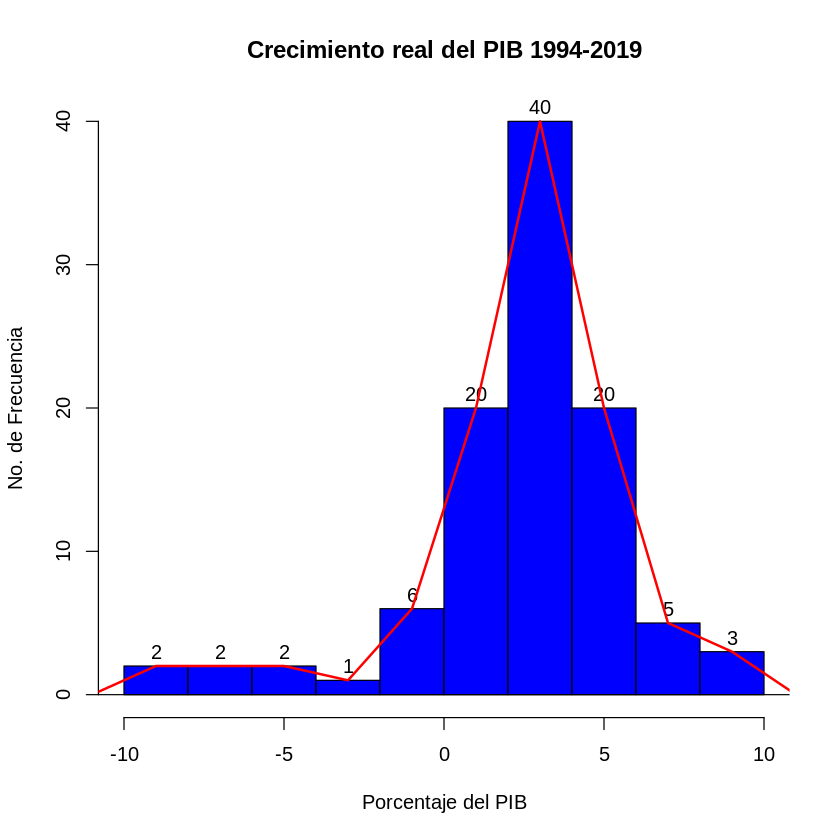

In [ ]:
histograma = hist(datos$Porcentaje, col = "Blue", 
                  nclass = n_clases, labels = TRUE, main = "Crecimiento real del PIB 1994-2019",
                  ylab = "No. de Frecuencia", xlab = "Porcentaje del PIB",
                  border = "black")
polygon.freq(histograma,col="red",frequency=1,lwd=2)

Tabla de frecuencias

In [ ]:
Intervalo_clases <- Rango/ n_clases
Frecuencia_absoluta <- table(datos$Porcentaje)
Valor_medio_clase <- histograma$counts

tablaf <- as.data.frame(table(Porcentaje = datos$Porcentaje))
transform(tablaf,
          FrecAc = cumsum(Freq),
          FrecRel_deClases = round(prop.table(Freq), 3),
          FreqRel_Ac = round(cumsum(prop.table(Freq)), 3))

Porcentaje,Freq,FrecAc,FrecRel_deClases,FreqRel_Ac
<fct>,<int>,<int>,<dbl>,<dbl>
-9.06758,1,1,0.01,0.010
-8.92601,1,2,0.01,0.020
-7.54378,1,3,0.01,0.030
-6.88648,1,4,0.01,0.040
-5.57061,1,5,0.01,0.050
-4.99051,1,6,0.01,0.059
-2.97417,1,7,0.01,0.069
-1.6007,1,8,0.01,0.079
-1.48542,1,9,0.01,0.089


**Distribucion normal**

¿Cual es la probabilidad de que el el PIB crezca menos de 2% tomando en cuenta que la media es de 2.471983 y la desviacion estandar de 3.308963?

In [ ]:
pnorm(2, mean = media, sd = Desviacion_estandar) #area de la curva antes del 2%

[1] 0.4432881

In [ ]:
x1=min(datos$Porcentaje)
x2=2
media = mean(datos$Porcentaje)
Desviacion_estandar = sd(datos$Porcentaje)
z1 = (x1-media)/Desviacion_estandar
z2 = (x2-media)/Desviacion_estandar
z1; z2
#tabla: 
#z2 = -0.1426379 = 0.4443
#[-inf, 0.4443]
#P(Z < 2)
0.4443*100
#la probabilidad de que el PIB crezca menos de 2%

[1] -3.487366

[1] -0.1426379

[1] 44.43

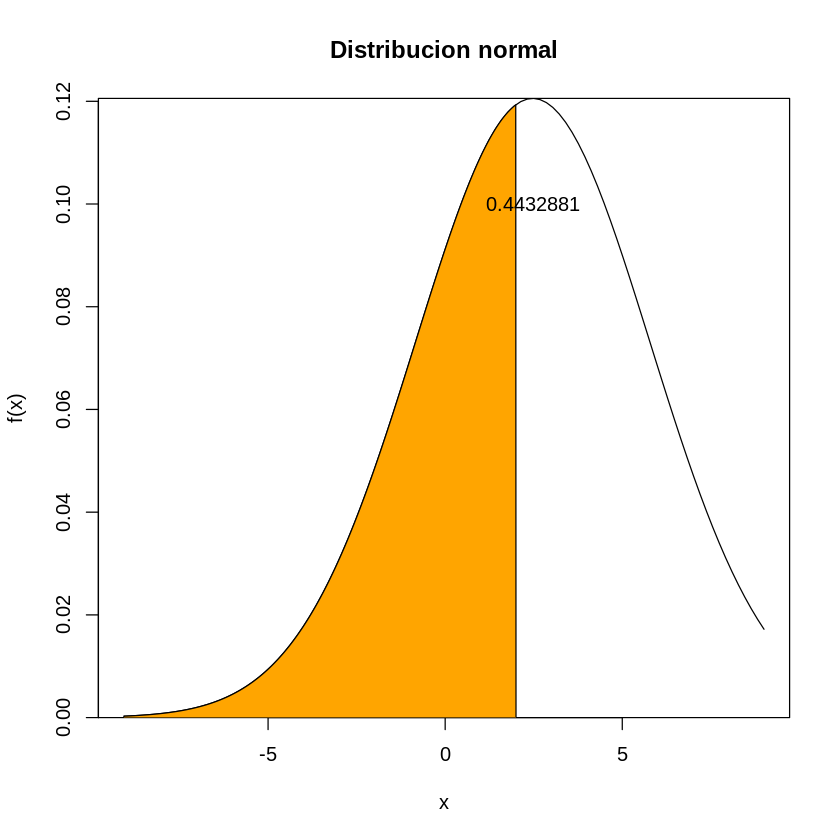

In [ ]:
#---------------Grafica----------------------------------------#
n <- length(datos$Porcentaje)
x <- datos$Porcentaje
ymax =max(dnorm(x, media, Desviacion_estandar))
max = max(datos$Porcentaje)
min = min(datos$Porcentaje)
regionx = seq(x1, x2, 0.01)
xP <- c(x1, regionx, x2)
yP <- c(0, dnorm(regionx, media, Desviacion_estandar), 0)
curve(dnorm(x, media, Desviacion_estandar), 
            xlim = c(min, max), yaxs = "i", 
            ylim=c(0, ymax), ylab = "f(x)",
                main="Distribucion normal")
polygon(xP, yP, col="orange1")
text(media, .1,"0.4432881")

**Estimacion por intervalo de una media**

En una muestra de 101 datos, el PIB crece en promedio 2.471983 con una desviacion estandar de 3.308963 construya un intervalo de confianza de 99% (2.575)

In [ ]:
media = mean(datos$Porcentaje)
Desviacion_estandar = sd(datos$Porcentaje)
z = 2.575
P1 <- media - (z*(Desviacion_estandar / (sqrt(n))))
P2 <- media + (z*(Desviacion_estandar / (sqrt(n))))
P1; P2
#(1.624154 <= M <= 3.319813) con un 95% de certeza

[1] 1.624154

[1] 3.319813

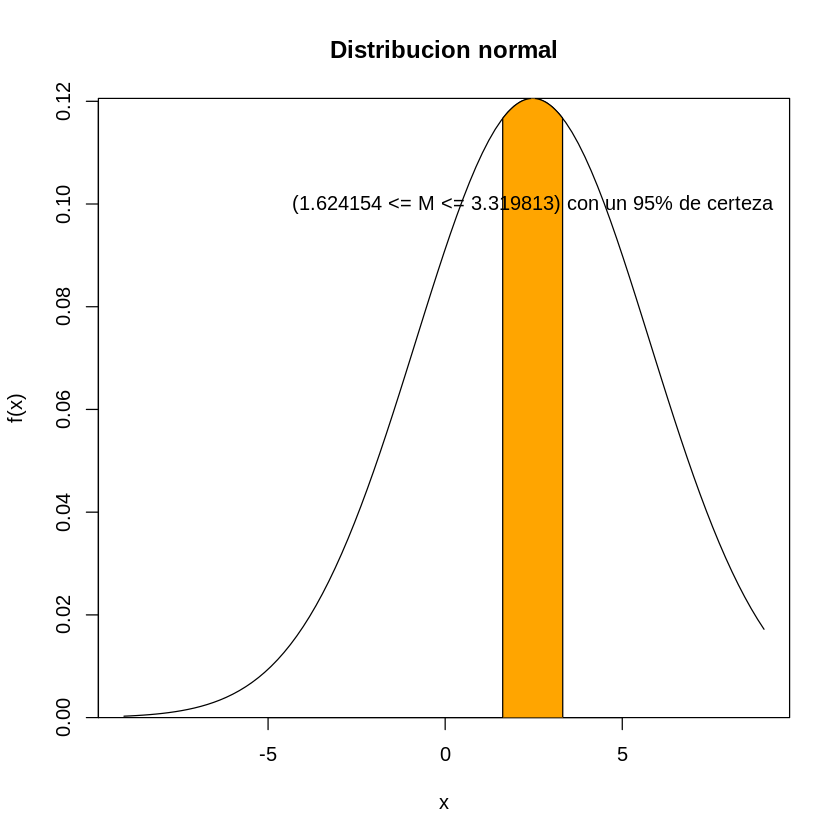

In [ ]:
#------------------Grafica----------------------------#
x <- datos$Porcentaje
x1 <- P1
x2 <- P2
n <- length(datos$Porcentaje)
ymax <- max(dnorm(x, media, Desviacion_estandar))
max <- max(datos$Porcentaje)
min <- min(datos$Porcentaje)
regionX <- seq(x1, x2, 0.01)
xP <- c(x1, regionX, x2)
yP <- c(0, dnorm(regionX, media, Desviacion_estandar),0)
curve(dnorm(x, media, Desviacion_estandar), xlim = c(min, max), yaxs = "i", ylim = c(0, ymax), ylab = "f(x)",
      main = "Distribucion normal")
polygon(xP, yP, col = "orange1")
text(media, .10, "(1.624154 <= M <= 3.319813) con un 95% de certeza")